In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 8].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [7]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,8,2012-01-01,66.0,45.0,55.5,NaN,34.0,46.0,9.5,-9.5,NaN,NaN,RA BR,0.0,0.0,30.05,NaN,11.0,36.0,10.9,2012,1,1,44.118141,52.612346,NaN,6,1,2,1,0,0
1,8,2012-01-02,59.0,36.0,47.5,NaN,29.0,40.0,17.5,-17.5,NaN,NaN,MD,0.0,0.0,30.25,NaN,6.2,36.0,6.7,2012,1,2,48.442162,44.323754,NaN,0,0,0,0,0,1
2,8,2012-01-03,61.0,30.0,45.5,NaN,28.0,38.0,19.5,-19.5,NaN,NaN,MD,0.0,0.0,30.12,NaN,3.9,16.0,3.9,2012,1,3,50.145038,43.754275,NaN,1,0,0,0,0,1
3,8,2012-01-04,72.0,37.0,54.5,NaN,45.0,49.0,10.5,-10.5,NaN,NaN,MD,0.0,0.0,29.90,NaN,1.4,24.0,2.6,2012,1,4,70.221777,55.103712,NaN,2,0,0,0,0,1
4,8,2012-01-05,70.0,46.0,58.0,NaN,46.0,52.0,7.0,-7.0,NaN,NaN,MD,0.0,0.0,29.87,NaN,0.9,33.0,1.0,2012,1,5,64.262923,60.832000,NaN,3,0,0,0,0,1


In [8]:
len(station)

1035

In [9]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 883 ( 85.31 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 1035 ( 100.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 32 ( 3.09 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 1035 ( 100.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [10]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [11]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [12]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
109108,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,107,0
109109,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,108,0
109110,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,109,0
109111,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,110,0
109112,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,111,2


In [13]:
station['log1p_units'] = np.log1p(station.units)

In [14]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [15]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
109108,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,107
109109,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,108
109110,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,109
109111,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,110
109112,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,111


In [16]:
len(station)

109113

In [17]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [18]:
df2.to_csv("station8.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [19]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure  \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1192.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:48:18   Log-Likelihood:            -1.1687e+05
No. Observations:              105894   AIC:                         2.341e+05
Df Residuals:                  105720   BIC:                         2.358e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      0.4755      0

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [20]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1192.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:54:57   Log-Likelihood:            -1.1687e+05
No. Observations:              105894   AIC:                         2.341e+05
Df Residuals:                  105720   BIC:                         2.358e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [21]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1593

In [22]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
107515,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,107,0
107516,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,108,0
107517,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,109,0
107518,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,110,0
107519,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,111,2


In [23]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1170.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:57:10   Log-Likelihood:                -43662.
No. Observations:              104351   AIC:                         8.767e+04
Df Residuals:                  104177   BIC:                         8.934e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

### 4. 변수변환 : df2 (log1p_units) 

In [24]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure)  + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     2959.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:58:12   Log-Likelihood:                 80935.
No. Observations:              105894   AIC:                        -1.615e+05
Df Residuals:                  105720   BIC:                        -1.599e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야함

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [26]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1652

In [27]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
107456,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,107,0.000000
107457,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,108,0.000000
107458,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,109,0.000000
107459,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,110,0.000000
107460,8,2014-10-31,78.0,55.0,66.5,NaN,63.966667,67.233333,0.0,2.0,NaN,NaN,RA,NaN,0.005,29.82,NaN,3.443333,NaN,5.1,2014,10,31,91.561343,67.568156,NaN,4,0,2,1,0,0,39,111,1.098612


In [28]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3110.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:00:52   Log-Likelihood:             1.4251e+05
No. Observations:              104298   AIC:                        -2.847e+05
Df Residuals:                  104124   BIC:                        -2.830e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 더 올라갔다, conditional number는 약간 낮아짐

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [29]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3110.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:01:40   Log-Likelihood:             1.4251e+05
No. Observations:              104298   AIC:                        -2.847e+05
Df Residuals:                  104124   BIC:                        -2.830e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/dewpoint/windchill제거(VIF에 근거)

In [33]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) \
                            + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3203.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:05:20   Log-Likelihood:             1.4251e+05
No. Observations:              104298   AIC:                        -2.847e+05
Df Residuals:                  104129   BIC:                        -2.831e+05
Df Model:                         168                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/dewpoint/windchill제거+wetbulb/stnpressure(VIF에 근거)--> 아래 VIF부분으로 갈 것.

In [41]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) \
                            + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3241.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:08:28   Log-Likelihood:             1.4251e+05
No. Observations:              104298   AIC:                        -2.847e+05
Df Residuals:                  104131   BIC:                        -2.831e+05
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/dewpoint/windchill제거+wetbulb/stnpressure(VIF에 근거) + avgspeed제거--> 아래 VIF부분으로 갈 것.

In [44]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir)\
                            + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0',  data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3261.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:10:37   Log-Likelihood:             1.4251e+05
No. Observations:              104298   AIC:                        -2.847e+05
Df Residuals:                  104132   BIC:                        -2.831e+05
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 4. 변수변환 :  df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/dewpoint/windchill제거+wetbulb/stnpressure(VIF에 근거) + avgspeed제거-+ 유의하지 않은 변수 제거 -> 정규화

In [52]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(item_nbr) + 0',  data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     4764.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:14:45   Log-Likelihood:                 82848.
No. Observations:              109113   AIC:                        -1.655e+05
Df Residuals:                  109002   BIC:                        -1.644e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(item_nbr)[1]            0      0.004  

### F- 검정

In [53]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(item_nbr),111.0,6859.582606,61.798041,4814.08627,0.0
Residual,109002.0,1399.249980,0.012837,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

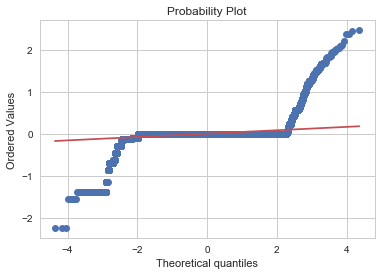

In [54]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',\
          'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill','item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

,VIF Factor,features
0,88845.335416,tavg
1,22055.313742,tmax
2,12389.942339,tmin
3,8184.593687,windchill
4,4530.281494,dewpoint
5,1921.466460,stnpressure
6,1877.477094,wetbulb
7,983.217420,relative_humility
8,42.839793,avgspeed
9,31.710696,resultspeed


tmax, tavg, tmin, windchill, dewpoint빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [34]:
cols = ['wetbulb', 'heat', 'cool',\
          'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']

sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,224.334887,wetbulb
1,121.959168,stnpressure
2,48.590321,relative_humility
3,34.876317,avgspeed
4,30.222893,resultspeed
5,8.479200,cool
6,4.122338,item_nbr
7,2.565002,heat
8,1.181563,preciptotal


### VIF : wetbulb 버리고 다시 

In [36]:
cols = [ 'heat', 'cool',\
          'preciptotal', 'stnpressure', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,36.818225,stnpressure
1,34.871618,avgspeed
2,30.210839,relative_humility
3,30.202439,resultspeed
4,4.122338,item_nbr
5,2.563347,cool
6,1.814548,heat
7,1.176042,preciptotal


### VIF : stnpressure 버리고 다시 

In [39]:
cols = ['heat', 'cool',\
          'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,34.198177,avgspeed
1,30.162095,resultspeed
2,6.794545,relative_humility
3,3.776372,item_nbr
4,2.520904,cool
5,1.790725,heat
6,1.165331,preciptotal


### VIF : avgspeed 버리고 다시 

In [42]:
cols = ['heat', 'cool',\
          'preciptotal', 'resultspeed', \
        'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,6.431121,relative_humility
1,3.769061,item_nbr
2,3.428835,resultspeed
3,2.516366,cool
4,1.787205,heat
5,1.104542,preciptotal


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [55]:
from patsy import dmatrix

In [56]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [57]:
len(df2_1_X), len(df2_1_target)

(107461, 107461)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [58]:
formula = 'C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.84855266, 0.7712625 , 0.81512867, 0.87506793, 0.82499142,
       0.87663626, 0.83453092, 0.8259563 , 0.8355872 , 0.83614678])

In [64]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.038707  , 0.05009728, 0.04737078, 0.04585232, 0.05153353,
       0.05008765, 0.04634778, 0.04430856, 0.05082775, 0.04364385])

In [73]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.001, L1_wt=0)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([0.73936778, 0.76229805, 0.78507816, 0.78275045, 0.80356581,
       0.81949841, 0.77322126, 0.76757623, 0.80979003, 0.77134935])

In [66]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([-0.00605143, -0.00465742, -0.00540277, -0.00453325, -0.0042034 ,
       -0.00497931, -0.00439334, -0.00579668, -0.00575942, -0.006508  ])

### station 평균성능

In [67]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.8343860623270668,
 0.04687765059629413,
 -0.005228501698427079,
 -0.005228501698427079)